In [1]:
#@title Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
#@title Import data
rice = pd.read_excel('../data/rice.xlsx')
X = rice.drop("Class", axis=1)
y = rice["Class"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree for rice classification


In [3]:
#@title Find the best parameters for Decision Tree

rice_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': ['None', 1, 2, 3, 4, 5, 6],
    'min_samples_split': ['None', 1, 2, 3],
    'min_samples_leaf': ['None', 1, 2, 3],
}

grid_search_dt = GridSearchCV(rice_clf, param_grid, cv=10)
grid_search_dt.fit(X_train, y_train)

print("Best parameters: ", grid_search_dt.best_params_)

Best parameters:  {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


C:\Users\Long\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
760 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Long\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Long\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

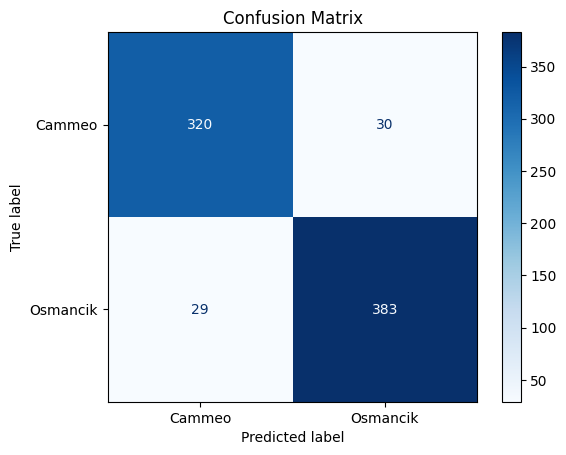

Accuracy: 92.2572
Sensitivity: 92.9612
Specificity: 91.4286
Precision: 92.7361
F1-Score: 92.8485
NPV: 91.6905
FPR: 8.5714
FDR: 7.2639
FNR: 7.0388


In [4]:
#@title Decision Tree

rice_clf = DecisionTreeClassifier(
    max_depth = grid_search_dt.best_params_['max_depth'],
    min_samples_leaf = grid_search_dt.best_params_['min_samples_leaf'],
    min_samples_split = grid_search_dt.best_params_['min_samples_split']
    )

rice_clf.fit(X_train, y_train)
y_pred = rice_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cammeo', 'Osmancik'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Compute all metrics
accuracy  = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fdr = fp / (tp + fp)
fnr = fn / (fn + tp)

print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Sensitivity: {sensitivity*100:.4f}")
print(f"Specificity: {specificity*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"F1-Score: {f1_score*100:.4f}")
print(f"NPV: {npv*100:.4f}")
print(f"FPR: {fpr*100:.4f}")
print(f"FDR: {fdr*100:.4f}")
print(f"FNR: {fnr*100:.4f}")

# Random Forest for rice classification


In [5]:
#@title Find the best parameters for Random Forest

rice_clf = RandomForestClassifier()

param_grid = {
  'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
}
grid_search_rf = GridSearchCV(rice_clf, param_grid, cv=10, verbose = 1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters: ", grid_search_rf.best_params_)

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Best parameters:  {'n_estimators': 26}


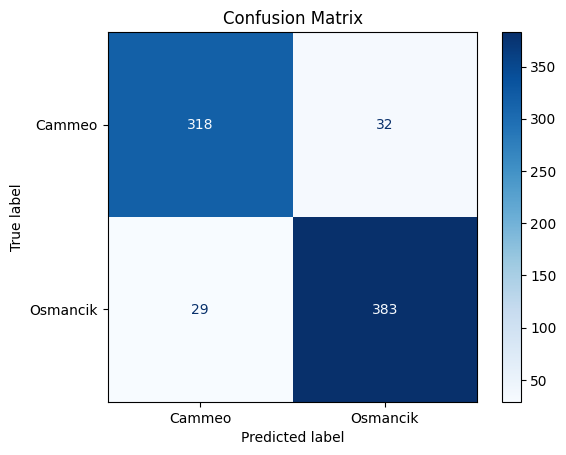

Accuracy: 91.9948
Sensitivity: 92.9612
Specificity: 90.8571
Precision: 92.2892
F1-Score: 92.6239
NPV: 91.6427
FPR: 9.1429
FDR: 7.7108
FNR: 7.0388


In [ ]:
#@title Random Forest

rice_clf = RandomForestClassifier(
    n_estimators = grid_search_rf.best_params_['n_estimators']
    )

rice_clf.fit(X_train, y_train)
y_pred = rice_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cammeo', 'Osmancik'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Compute all metrics
accuracy  = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fdr = fp / (tp + fp)
fnr = fn / (fn + tp)

print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Sensitivity: {sensitivity*100:.4f}")
print(f"Specificity: {specificity*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"F1-Score: {f1_score*100:.4f}")
print(f"NPV: {npv*100:.4f}")
print(f"FPR: {fpr*100:.4f}")
print(f"FDR: {fdr*100:.4f}")
print(f"FNR: {fnr*100:.4f}")